<h1 style="color:#03499A; border-radius: 4px; border: 3px solid #03499A; background-color: #ffffff; padding: 5px"><b><img src="Hochschule_Mannheim_logo.png" style="width: 150px">Lukas Fesenmeier, 1823570, Dataset 3 </b></h1>

In [1]:
#Hilfsskripte
import Preprocessing_aux
from plotfunctions import *
from confidence_ellipse import *

#Basics
import numpy as np
import pandas as pd

#Visualistion
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

#Preprocessing
from scipy.signal import savgol_filter


In [2]:
#Read CSV File
file = "Data_3.csv"
rawberry = pd.read_csv(file, index_col=0).T

#Ectract Indexinformation
rawberry["Sample_Category"] = rawberry.index.str.strip(".1234567890").astype("category")

#Gererating index, dataset has none
sample_number = []
for i in range(1, 984):
    sample_number.append(i)
idx = pd.Index(sample_number, name="sample_number")

rawberry.set_index(idx, inplace=True)
rawberry.head()


Wavenumbers,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Sample_Category
sample_number,,,,,,,,,,,,,,,,,,,,,
1,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009,NON-Strawberry
2,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005,NON-Strawberry
3,0.002416,0.002480,0.002511,0.002611,0.002802,0.003031,0.003235,0.003316,0.003257,0.003136,...,0.000290,0.000185,0.000137,0.000090,0.000062,0.000031,0.000009,0.000007,0.000007,NON-Strawberry
4,0.002345,0.002292,0.002249,0.002303,0.002466,0.002642,0.002703,0.002671,0.002618,0.002567,...,0.000419,0.000267,0.000179,0.000119,0.000075,0.000043,0.000021,0.000008,0.000008,NON-Strawberry
5,0.002303,0.002342,0.002350,0.002419,0.002561,0.002737,0.002862,0.002860,0.002811,0.002750,...,0.000468,0.000299,0.000212,0.000140,0.000099,0.000054,0.000020,0.000012,0.000012,NON-Strawberry


In [3]:
#keep relevant information
y = np.array(rawberry["Sample_Category"].values)
sample_numbers = np.array(list(rawberry.index))

#Wavenumbers for plotting, prevent using last column: is category --> -2
dim = np.array(rawberry.columns[:-2].values.astype(np.float64))
display(dim[:10])

#Spektrum
X = np.array(rawberry.iloc[:,:-2].values.astype(np.float64))
display(X.shape)

array([899.327, 903.187, 907.047, 910.907, 914.767, 918.627, 922.487,
       926.347, 930.207, 934.067])

(983, 234)

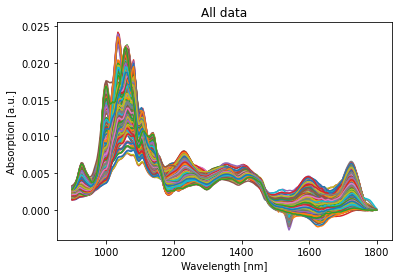

In [4]:
#Plotting of all data
def plotspec(X, dim, title= None):
    plt.figure()
    for i in range(len(X)):
        plt.plot(dim, X[i])
    
    plt.gca().set_title(title)

    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Absorption [a.u.]")
    plt.show()

plotspec(X,dim, "All data")

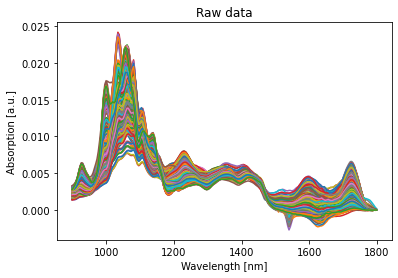

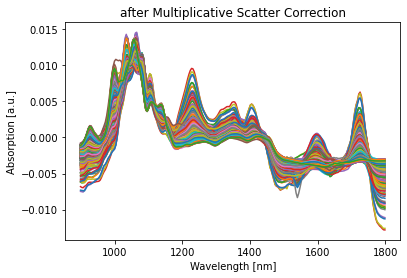

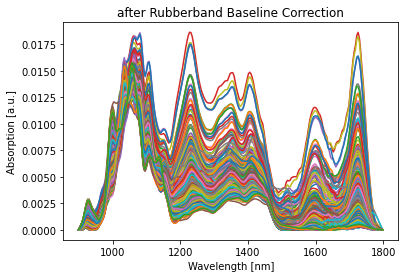

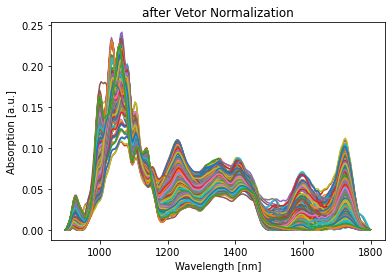

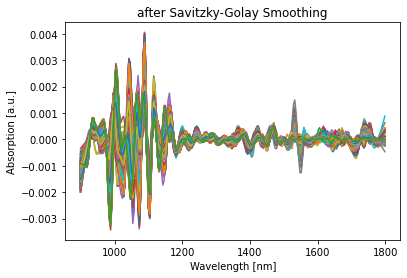

In [5]:
X_pre = X

plotspec(X_pre, dim, title='Raw data')
# Multiplicative Scatter Correction
X_pre = Preprocessing_aux.msc(X_pre)
plotspec(X_pre, dim, title='after Multiplicative Scatter Correction')



# Rubberband Baseline Correction
X_pre = Preprocessing_aux.rubberband(X_pre, dim)
plotspec(X_pre, dim, title='after Rubberband Baseline Correction')

#Normalize
X_pre = normalize(X_pre)  # from sklearn.preprocessing
plotspec(X_pre, dim, title='after Vetor Normalization')

# Savitzky-Golay Smoothing
w = 11 # window width
p = 4 # polynomial order
X_pre = savgol_filter(X_pre, w, polyorder = p, deriv=3)
plotspec(X_pre, dim, title='after Savitzky-Golay Smoothing')

<hr>
<h2>PCA</h2>

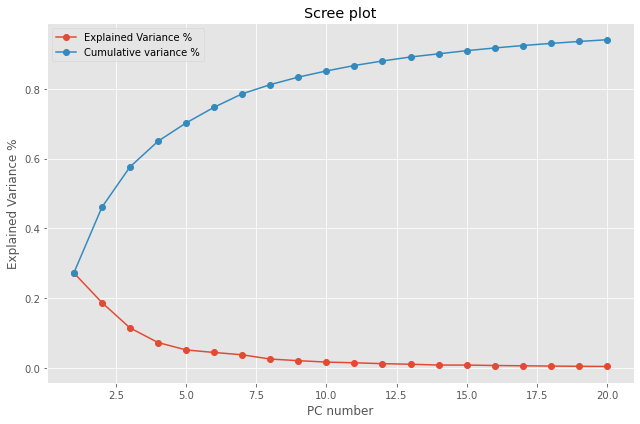

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cat
0,-12.670609,7.991905,1.326882,2.822429,-4.731461,6.778736,3.381493,-3.379500,0.786993,10.335744,NON-Strawberry
1,2.383037,-9.682456,-12.689358,-2.679926,-5.586772,-0.710443,4.568927,-2.139356,0.173049,-2.559933,NON-Strawberry
2,-2.025921,13.776221,-0.699561,0.776419,-4.250495,7.468818,2.483244,-1.006056,1.793793,1.219971,NON-Strawberry
3,-7.611628,6.394881,-3.101778,1.577710,1.062211,-3.924559,-0.635221,-1.988788,1.360538,-0.195458,NON-Strawberry
4,-5.558120,9.341456,-3.243567,3.610494,1.108439,-6.033951,1.919263,-1.416789,1.498599,4.563260,NON-Strawberry


In [6]:
#Standard Scaling
X_scaled = StandardScaler().fit_transform(X_pre)

#ScreePlot
PCA_Scree = PCA(n_components = 20).fit(X_scaled)
scree_plot(PCA_Scree)
plt.show()

#Scores
pca = PCA(n_components = 10)
scores = pca.fit_transform(X_scaled)
loadings = pca.components_.T


df = pd.DataFrame(scores)
df.columns = (("PC"+ str(i+1)) for i in range(10))
df["cat"] = y
df.head()

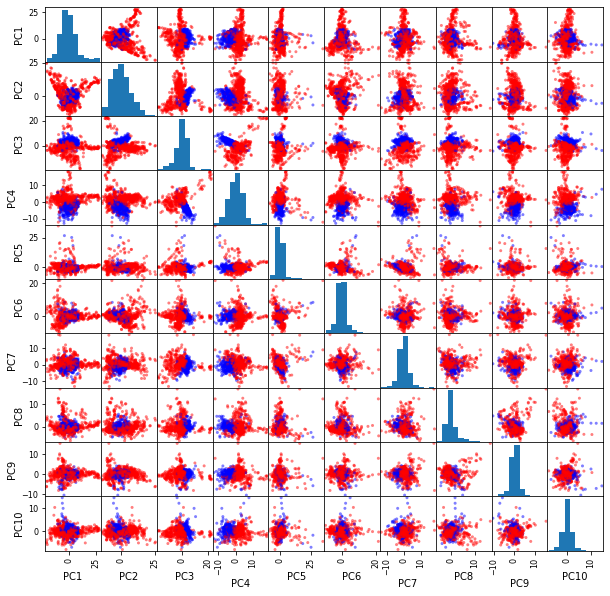

In [7]:
#Try and Error Plotting, all PCs --> 90plots

# for i in range(10):
#     for n in range(10):
#         if i ==n:
#             continue
#         else:
#             sns.scatterplot(data = df, x = df.iloc[:,i], y=df.iloc[:,n], hue ="cat")
#             plt.show()


colorlist=[]
for lab, row in df.iterrows():
    if row["cat"] == "Strawberry":
        colorlist.append("blue")
    else:
        colorlist.append("red")

pd.plotting.scatter_matrix(df,figsize=(10,10), c = colorlist)
plt.show()

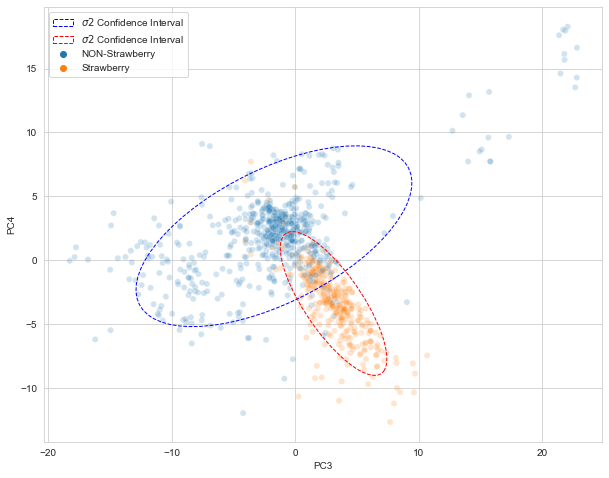

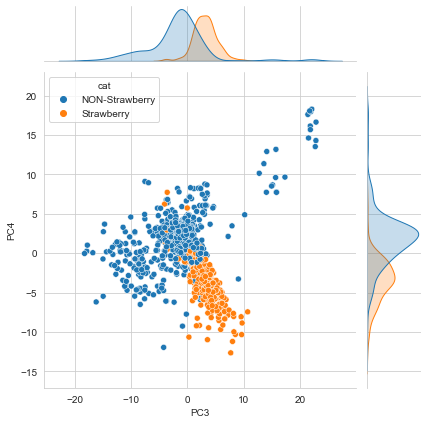

In [8]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
df_straw= df[df["cat"] == "Strawberry"]
df_non_straw= df[df["cat"] != "Strawberry"]
#ScatterPlot with Confidence Intervals
sns.scatterplot(data = df, x = df.iloc[:, 2], y = df.iloc[:, 3], hue = "cat", alpha = 0.2)

#Interval confidence ellypsen, funktioniert nur bei non_straw???
#confidence_ellipse_interv(x= df_straw["PC3"], y=df_straw["PC4"], ax= ax, facecolor='red', conf_interv="90", edgecolor = "red", linestyle="--")
#confidence_ellipse_interv(x= df_non_straw["PC3"], y=df_non_straw["PC4"], ax= ax, facecolor='blue', conf_interv="90", edgecolor = "blue", linestyle="--")

confidence_ellipse_std(x= df_non_straw["PC3"], y=df_non_straw["PC4"], ax= ax, n_std=2.0, edgecolor = "blue", linestyle="--", label="$\sigma2$ Confidence Interval")
confidence_ellipse_std(x= df_straw["PC3"], y=df_straw["PC4"], ax= ax, n_std=2.0, edgecolor = "red", linestyle="--", label="$\sigma2$ Confidence Interval")
plt.legend()
#JointPlot
sns.jointplot(data = df, x = df.iloc[:, 2], y = df.iloc[:, 3], hue = "cat", kind = "scatter")

<hr>
<h2>Euclid Distance, Mahalanobis Distance, 2dimensional simplified, Prediction Model</h2>


$
MD = \sqrt{ \left(\begin{array}{c} x - \bar{x} \\ y - \bar{y} \end{array}\right)^{T} S^{-1} \left(\begin{array}{c} x- \bar{x} \\ y -\bar{y} \end{array}\right)}
$

In [9]:
centroid = df.groupby("cat")[["PC3", "PC4"]].mean()
centroid

,PC3,PC4
cat,,
NON-Strawberry,-1.722958,1.879614
Strawberry,3.102306,-3.384376


In [10]:
def compute_MD(x_data, y_data, S, to="straw"):
    """computes Mahalanobis or Euklidian Distance from given Datapoints in 2 dimensional space

        Parameters
        to: string
            MD towards which Centroid
        x_data: float
            x-Datapoint
        y_data: float
            y-Datapoint
        S:  np.array
            Covarianz matrix       
    """
    if to == "straw":
        x_mu = centroid.iloc[1,0]
        y_mu = centroid.iloc[1,1]
    else:
        x_mu = centroid.iloc[0,0]
        y_mu = centroid.iloc[0,1]


    A = np.array([[x_data - x_mu], [y_data - y_mu]])
    A_T= A.transpose()

    S_invers = np.linalg.inv(S)

    #Euklid 
    #MD = np.sqrt(A_T @ A)

    #Mahalanobis
    MD = np.sqrt(A_T @ S_invers @ A)
    return MD

In [11]:
MD_to_straw=[]
MD_to_non_straw=[]

x_y_zipped = list(zip(df["PC3"], df["PC4"]))
for tp in x_y_zipped:
    MD = compute_MD(x_data = tp[0], y_data=tp[1], S =np.cov(df["PC3"], df["PC4"]), to = "straw")
    MD_to_straw.append(MD.round(decimals = 4))
for tp in x_y_zipped:
    MD = compute_MD(x_data = tp[0], y_data=tp[1], S =np.cov(df["PC3"], df["PC4"]), to = "non")
    MD_to_non_straw.append(MD.round(decimals = 4))

df["MD_to_straw"] = MD_to_straw
df["MD_to_non_straw"] = MD_to_non_straw
df["MD_to_straw"] = df["MD_to_straw"].astype(float)
df["MD_to_non_straw"] = df["MD_to_non_straw"].astype(float)

# new Prediction Column 
Prediction = []
for lab, row in df.iterrows():
    if row["MD_to_non_straw"] > row["MD_to_straw"]:
        Prediction.append("Strawberry")
    else:
        Prediction.append("NON-Strawberry")

df["Prediction"] = Prediction

#new Validation column
Validation = []
for lab, row in df.iterrows():
    if row["cat"]== row["Prediction"]:
        Validation.append(True)
    else:
        Validation.append(False)
df["Validation"] = Validation
df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cat,MD_to_straw,MD_to_non_straw,Prediction,Validation
99,3.371252,2.479850,7.201194,-7.866390,-0.015088,-0.642697,-1.431045,-0.213621,-0.325734,-2.704654,Strawberry,1.3372,2.9090,Strawberry,True
292,18.639576,6.902771,-1.720642,2.975362,1.439055,-1.394496,-0.410308,0.423974,0.425427,0.631029,NON-Strawberry,1.7914,0.2640,NON-Strawberry,True
670,-1.850267,6.843261,-0.692844,1.778586,0.218395,-3.197849,3.446924,-2.089370,0.583009,2.514204,NON-Strawberry,1.4425,0.1996,NON-Strawberry,True
272,-2.423964,-0.504946,-1.551288,1.680994,1.026812,-3.769851,0.028083,-2.115781,0.731485,-1.243812,NON-Strawberry,1.5136,0.0581,NON-Strawberry,True
435,7.301263,5.086315,6.553902,-7.425095,0.560395,-2.075498,-0.780341,0.057975,0.767930,-2.707989,Strawberry,1.1785,2.7499,Strawberry,True


In [12]:
df["Validation"].value_counts(normalize = True)

True     0.899288
False    0.100712
Name: Validation, dtype: float64

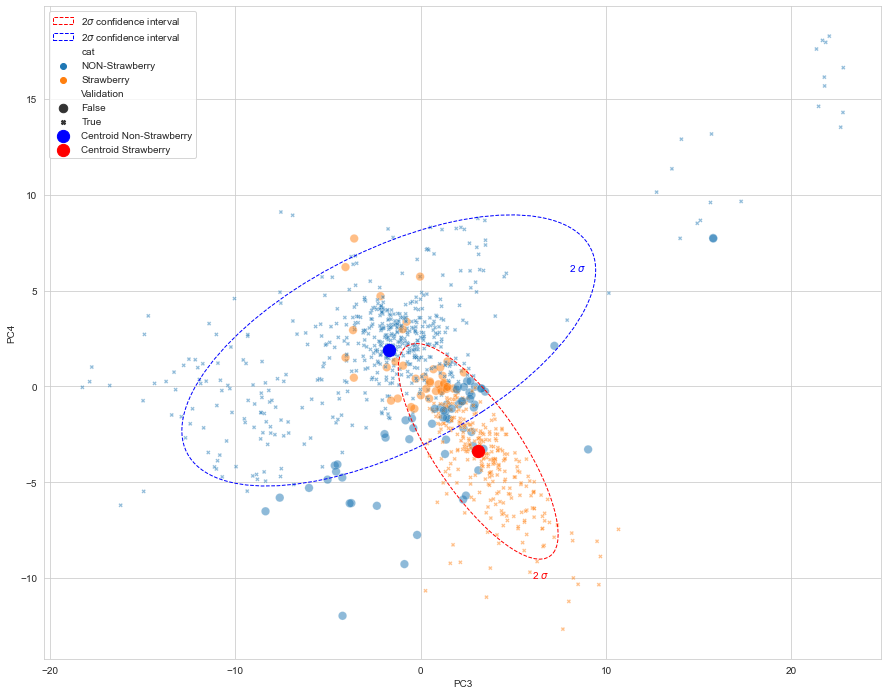

In [13]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data = df, x = "PC3", y = "PC4", hue= "cat", size = "Validation", style = "Validation", alpha = 0.5)
confidence_ellipse_std(x= df_straw["PC3"], y=df_straw["PC4"], ax= ax, n_std= 2.0, edgecolor = "red", linestyle="--", label="2$\sigma$ confidence interval")
confidence_ellipse_std(x= df_non_straw["PC3"], y=df_non_straw["PC4"], ax= ax, n_std = 2.0, edgecolor = "blue", linestyle="--", label="2$\sigma$ confidence interval")
ax.annotate("2 $\sigma$", xy= (8,6), color = "blue", label= "Centroid")
ax.annotate("2 $\sigma$", xy= (6,-10), color = "red", label = "Centroid")

#Display Centroids
plt.scatter(centroid.iloc[0,0], centroid.iloc[0,1], color = "blue", s = 150, label="Centroid Non-Strawberry") 
plt.scatter(centroid.iloc[1,0], centroid.iloc[1,1], color = "red", s = 150, label = "Centroid Strawberry") 
plt.legend()

<h3>Diskussion</h3>
<p>90% Erfolgsquote<br>
<u>Probleme:</u>
</p>
<ul>
    <li>Schnittmengen</li>
    <li>im Datenraum weit entfernt liegende Punkte</li>
</ul>
<br>
<u>Verbesserungsmöglichkeiten:</u>
<ul>
    <li>mehr Dimensionen hinzunehmen?, keine Begrenzung auf 2</li>
    <li>anderes Modell?</li>
    <li>andere Auswahl an PCs? <a href="strawberries_deriv4_PC3und5.ipynb">Link to deriv=4, PC3 und PC5</a></li>
</ul>

<hr>
<h2>Betrachten der Principal Components</h2>


In [14]:
#Rethink about loadings and scores Matrix

display(loadings.shape)
display(scores.shape)

(234, 10)

(983, 10)

In [15]:
#Import second loadings Matrix
loadings2 = pd.read_csv("Transfer/loadings_pca_new.csv")
loadings2.drop("Unnamed: 0", axis = 1, inplace = True)
loadings2 = np.array(loadings2)
loadings2.shape == loadings.shape

False

In [16]:
#Import second scores Matrix
scores2 = pd.read_csv("Transfer/scores_pca_new.csv")
scores2.drop("Unnamed: 0", axis = 1, inplace = True)
scores2 = np.array(scores2)
scores2.shape == scores.shape

True

Text(0.5, 1.0, 'SGS deriv = 4')

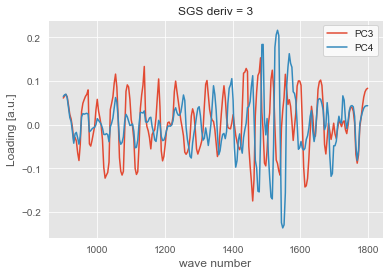

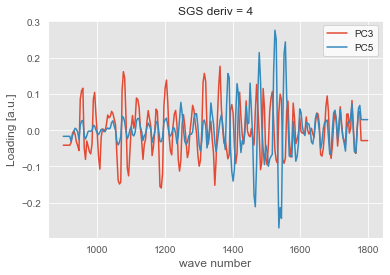

In [17]:
loading_plot(loadings, dim, PCs=[3,4])
plt.title("SGS deriv = 3")
loading_plot(loadings2, dim, PCs=[3,5])
plt.title("SGS deriv = 4")

<h3>Auffälligkeiten</h3>
<p>Besonders sticht ins Auge, dass bei der Wellenzahl von 1550 starke Differenzierungen stattfinden. Diese Wellenzahl ist die entscheidenste bei der Kategorisierung</p>

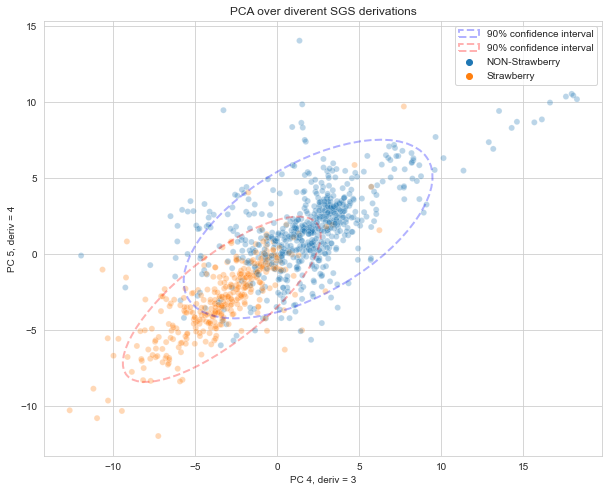

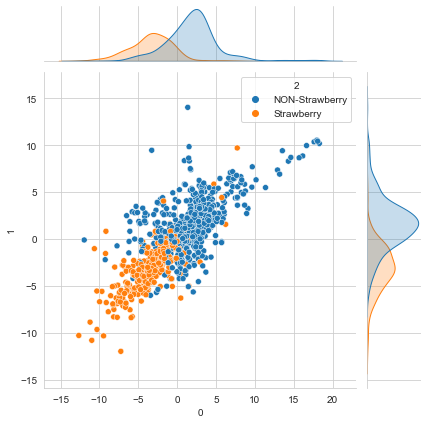

In [18]:
#mixedDataFrame
mixed = pd.DataFrame([scores[:,3], scores2[:,4]]).T
mixed["cat"] = y
mixed.columns = ["PC 4, deriv = 3","PC 5, deriv = 4", "cat"]
mixed_only_straw = mixed[mixed["cat"]=="Strawberry"]
mixed_not_straw = mixed[mixed["cat"]!="Strawberry"]
# PC3 of deriv3 against PC5 of deriv 4
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x = scores[:,3], y =scores2[:,4], hue = y, alpha=0.3, ax = ax)

confidence_ellipse_interv(mixed_not_straw["PC 4, deriv = 3"], mixed_not_straw["PC 5, deriv = 4"], ax= ax, conf_interv="90", edgecolor = "blue", linestyle="--", linewidth= 2, label = "90% confidence interval")
confidence_ellipse_interv(mixed_only_straw["PC 4, deriv = 3"], mixed_only_straw["PC 5, deriv = 4"], ax= ax, conf_interv="90", edgecolor = "red", linestyle="--", linewidth= 2, label = "90% confidence interval")

ax.set_title("PCA over diverent SGS derivations") #Savitzki Golay Smoothing derivations
plt.legend()
plt.xlabel("PC 4, deriv = 3")
plt.ylabel("PC 5, deriv = 4")


SGS_dataFrame = pd.DataFrame([scores[:,3], scores2[:,4], y]).T
#SGS_dataFrame
sns.jointplot(data = SGS_dataFrame, x = SGS_dataFrame.iloc[:, 0], y = SGS_dataFrame.iloc[:, 1], hue = SGS_dataFrame.iloc[:, 2], kind = "scatter")

<hr>
<h2>Analysis of PCR and Outliers</h2>

32.99855717928919

22.791097689469265

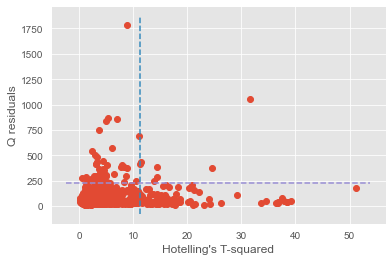

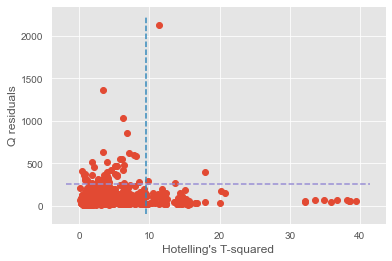

In [19]:
#Tsq with k = 5 from other file PCA
X_scaled_new2 = pd.read_csv("Transfer/X_scaled_new.csv")
X_scaled_new2.drop("Unnamed: 0", axis = 1, inplace = True)
X_scaled_new2 = np.array(X_scaled_new2)
fig, Q_new, Tsq_new = Tsq_Q_plot(X_scaled_new2, scores2[:, :5], loadings2[:,:5], conf= 0.95 )
display(np.var(Tsq_new))

#T2-Q-Plot with k = 4 from this file 

fig, Q, Tsq = Tsq_Q_plot(X_scaled, scores[:, :4], loadings[:,:4], conf=0.95)
display(np.var(Tsq))

In [20]:
def outlier_removal(Q, T2, Q_remove = 1, T2_remove = 2):
    """Returns an 1d array containing indeces of outliers based on a Tsq Plot
    Parameters, Finally it also returns the new Tsq Plot

    Parameters
        Q_remove: Number of Outliers to remove from Q
        T2_remove: Number of Outliers to remove from T2
    """
    delete_rows=[]
    for i in range(Q_remove):
        delete_rows.append(np.argmax(Q)) #gets index of highest value in array
        Q[np.argmax(Q)] = 0                #sets this index to 0 for next measurement
        T2[np.argmax(Q)] = 0                #to prevent double treatment if value is extraordonary in t2 AND q
    for n in range(T2_remove):
        delete_rows.append(np.argmax(T2))
        Q[np.argmax(T2)] = 0
        T2[np.argmax(T2)] = 0
    with plt.style.context(('ggplot')):
        fig = plt.plot(T2, Q, 'o') 
        
        plt.xlabel("Hotelling's T-squared")
        plt.ylabel('Q residuals')
        plt.title("T2Q Plot with deleted Outliers")
    plt.show()
    print("Outlier-Indexes:" + str(delete_rows))
    return delete_rows

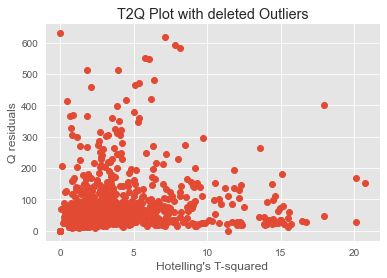

Outlier-Indexes:[717, 719, 64, 115, 637, 636, 953, 324, 307, 323, 970, 653, 971, 654]


In [21]:
outlier_indeces = outlier_removal(Q, Tsq, Q_remove = 4, T2_remove = 10)

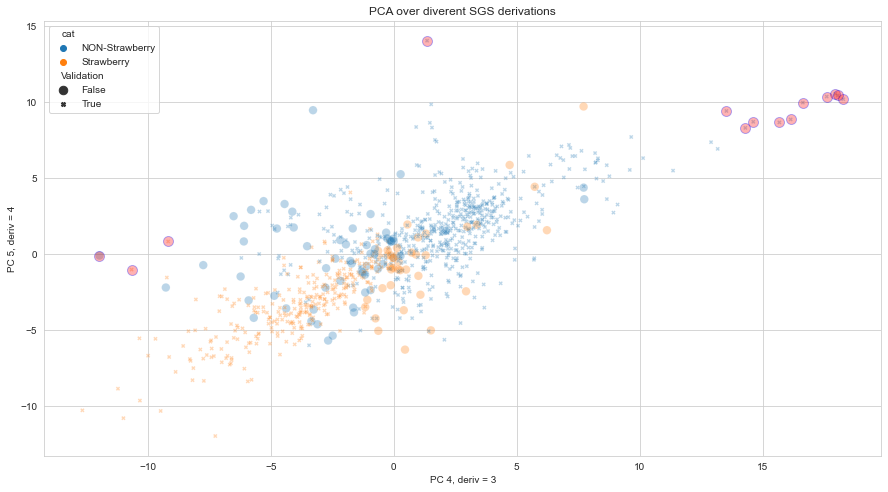

In [22]:
SGS_dataFrame = pd.DataFrame([scores[:,3], scores2[:,4], y]).T
SGS_dataFrame.columns = ["PC4, deriv3", "PC5, deriv4", "cat"]
fig, ax = plt.subplots(figsize= (15,8))
sns.scatterplot(x = SGS_dataFrame.iloc[:,0], y = SGS_dataFrame.iloc[:,1], hue = SGS_dataFrame.iloc[:,2], size = df["Validation"], style = df["Validation"], alpha=0.3, )
ax.set_title("PCA over diverent SGS derivations") #Savitzki Golay Smoothing derivations
plt.xlabel("PC 4, deriv = 3")
plt.ylabel("PC 5, deriv = 4")

for outlier in outlier_indeces:
    plt.plot(SGS_dataFrame.iloc[outlier, 0], SGS_dataFrame.iloc[outlier, 1], color = "green", alpha = 0.3, marker =  ".", mec = "b", markerfacecolor = "red", markersize = 20)

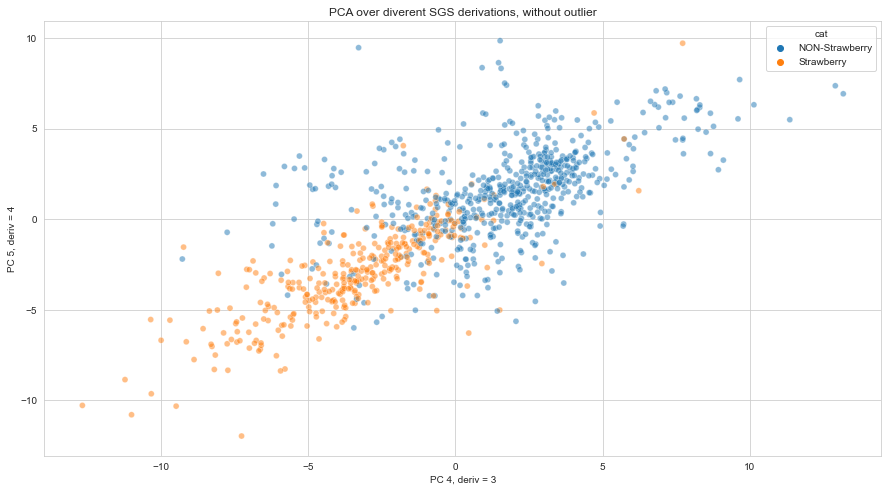

In [23]:
#Remove outliers from data
cond = SGS_dataFrame.index.isin(outlier_indeces)
new_SGS_dataFrame = SGS_dataFrame[~cond]
fig, ax = plt.subplots(figsize= (15,8))
sns.scatterplot(x = new_SGS_dataFrame.iloc[:,0], y = new_SGS_dataFrame.iloc[:,1], hue = new_SGS_dataFrame.iloc[:,2], alpha=0.5)
ax.set_title("PCA over diverent SGS derivations, without outlier") #Savitzki Golay Smoothing derivations
plt.xlabel("PC 4, deriv = 3")
plt.ylabel("PC 5, deriv = 4")
plt.show()

<hr>
<h2>Deleting Outliers and new PCA</h2>

In [24]:
#Ausreißer rauswerfen
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df["cat"] = y
X_scaled_df.columns = rawberry.columns[1:]
cond = X_scaled_df.index.isin(outlier_indeces)
X_scaled_df_new = X_scaled_df[~cond]

# #keep relevant information
y_new = np.array(X_scaled_df_new["Sample_Category"].values)
dim_new = np.array(X_scaled_df_new.columns[:-2].values.astype(np.float64)) #no wavenumber, only integers

# #Spektrum
X_new = np.array(X_scaled_df_new.iloc[:,:-2].values.astype(np.float64))
display(X_new.shape)

(969, 233)

In [25]:

# Multiplicative Scatter Correction
X_new_pre = Preprocessing_aux.msc(X_new)

# Rubberband Baseline Correction
X_new_pre = Preprocessing_aux.rubberband(X_new_pre, dim_new)

#Normalize
X_new_pre = normalize(X_pre)  # from sklearn.preprocessing

# Savitzky-Golay Smoothing
w = 11 # window width
p = 4 # polynomial order
X_new_pre = savgol_filter(X_new_pre, w, polyorder = p, deriv=0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cat
0,14.140549,3.013019,1.680583,3.624503,-6.825283,3.091471,-0.920039,3.523770,-0.618940,15.728494,NON-Strawberry
1,-4.531021,-9.168066,12.035385,-3.719981,0.244790,-1.326797,4.942991,4.056637,-1.927056,-0.961402,NON-Strawberry
2,3.876967,14.892647,3.772963,-0.920385,-7.189916,3.408388,-1.868902,4.352206,1.975823,1.125472,NON-Strawberry
3,9.069172,3.967187,3.378044,0.453872,3.653769,-3.169277,-3.684400,-0.935002,-0.705170,-2.953511,NON-Strawberry
4,7.572173,7.703643,4.844033,1.630718,4.805446,-5.964694,-5.668202,0.227290,2.488124,2.750858,NON-Strawberry


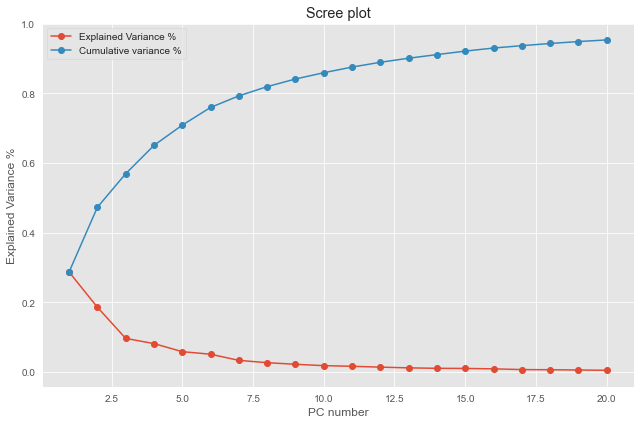

In [26]:
#Standard Scaling
X_new_scaled = StandardScaler().fit_transform(X_new_pre)

#ScreePlot
PCA_Scree2 = PCA(n_components = 20).fit(X_new_scaled)
scree_plot(PCA_Scree2)

#Scores
pca = PCA(n_components = 10)
scores_new = pca.fit_transform(X_new_scaled)
loadings_new = pca.components_.T


scores_new_dataFrame = pd.DataFrame(scores_new)
scores_new_dataFrame.columns = (("PC"+ str(i+1)) for i in range(10))
scores_new_dataFrame["cat"] = y
scores_new_dataFrame.head()

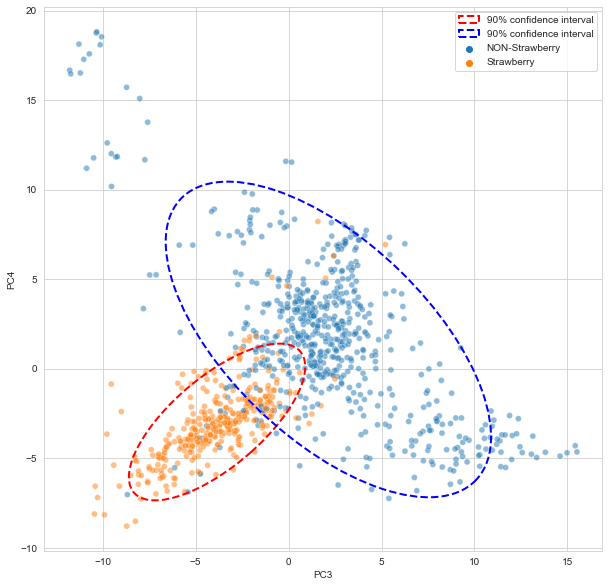

<Figure size 432x288 with 0 Axes>

In [27]:
scores_new_dataFrame_onlystraw = scores_new_dataFrame[scores_new_dataFrame["cat"]== "Strawberry"]
scores_new_dataFrame_nonstraw = scores_new_dataFrame[scores_new_dataFrame["cat"]!= "Strawberry"]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data = scores_new_dataFrame, x = "PC3", y = "PC4", hue = "cat", alpha = 0.5, ax =ax)

confidence_ellipse_std(scores_new_dataFrame_onlystraw["PC3"], scores_new_dataFrame_onlystraw["PC4"],
ax= ax, n_std = 2, edgecolor = "red", linestyle="--", linewidth= 2, label = "90% confidence interval")
confidence_ellipse_std(scores_new_dataFrame_nonstraw["PC3"], scores_new_dataFrame_nonstraw["PC4"], 
ax= ax, n_std = 2, edgecolor = "blue", linestyle="--", linewidth= 2, label = "90% confidence interval")
plt.legend()
plt.show()
plt.clf()



<p>Das Herausnehmen der n größten Abweichungen vom PCA Modell verbessert eine erneute Durchführung zumindest ein bischen. Diese schlussfolgert aus einer Betrachtung der Konfidenzellypsen, deren Überschneidungsfläche reduziert wurde </p>


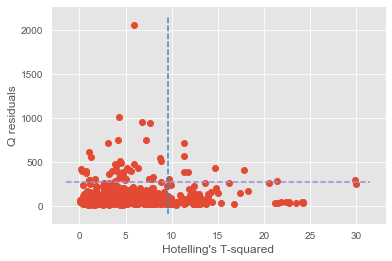

16.756958213365206

In [28]:
fig, Q_without_outlier, Tsq_without_outlier = Tsq_Q_plot(X_new_scaled, scores_new[:, :4], loadings_new[:,:4], conf=0.95)
plt.show()
np.var(Tsq_without_outlier)

<hr>
<h2>Fazit</h2>
<ol>
    <li>Import des Datensatzes</li>
    <li>Vorverarbeitung der Spektraldaten</li>
    <li>PCA in der 3. und 4. Ableitung des SGS</li>
    <li>Mahalanobis Distance Analyse, Scores-Plots</li>
    <li>Untersuchung der Principal Components, Loadings-Plots</li>
    <li>Analyse der PCA, T2Q-Plot</li>
    <li>Einfluss der Ausreißer und PCA ohne Ausreißer</li>
</ol>